#Experiment 2: Varying dropout

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

#Load and preprocess CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

#Image Normalization
train_images, test_images = train_images / 255.0, test_images / 255.0

# Create a list of dropout rates to experiment with
dropout_rates = [0.2, 0.4, 0.5]
results = {}

for dropout_rate in dropout_rates:
    # Create a CNN model with the specified dropout rate
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dropout(dropout_rate),
        layers.Dense(128, activation='relu'),
        layers.Dense(10)
    ])

    # Compile the model
    model.compile(optimizer='adam',
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

    # Train the model
    history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels), verbose=1)

    # Calculate final training and testing loss and accuracy
    final_training_loss = history.history['loss'][-1]
    final_training_accuracy = history.history['accuracy'][-1]
    final_testing_loss = history.history['val_loss'][-1]
    final_testing_accuracy = history.history['val_accuracy'][-1]

    # Store the results
    results[f'Dropout {dropout_rate}'] = {
        'Final Training Loss': final_training_loss,
        'Final Training Accuracy': final_training_accuracy,
        'Final Testing Loss': final_testing_loss,
        'Final Testing Accuracy': final_testing_accuracy
    }

170498071/170498071 [==============================] - 14s 0us/step
Epoch 1/10
1563/1563 [==============================] - 19s 5ms/step - loss: 1.4667 - accuracy: 0.4733 - val_loss: 1.1599 - val_accuracy: 0.5939
Epoch 2/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.1208 - accuracy: 0.6071 - val_loss: 1.1177 - val_accuracy: 0.6019
Epoch 3/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.9887 - accuracy: 0.6540 - val_loss: 0.9364 - val_accuracy: 0.6728
Epoch 4/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.9031 - accuracy: 0.6843 - val_loss: 0.9426 - val_accuracy: 0.6738
Epoch 5/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8284 - accuracy: 0.7083 - val_loss: 0.9479 - val_accuracy: 0.6757
Epoch 6/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7683 - accuracy: 0.7331 - val_loss: 0.8463 - val_accuracy: 0.7056
Epoch 7/10
1563/1563 [==============================] - 8s 5ms/step

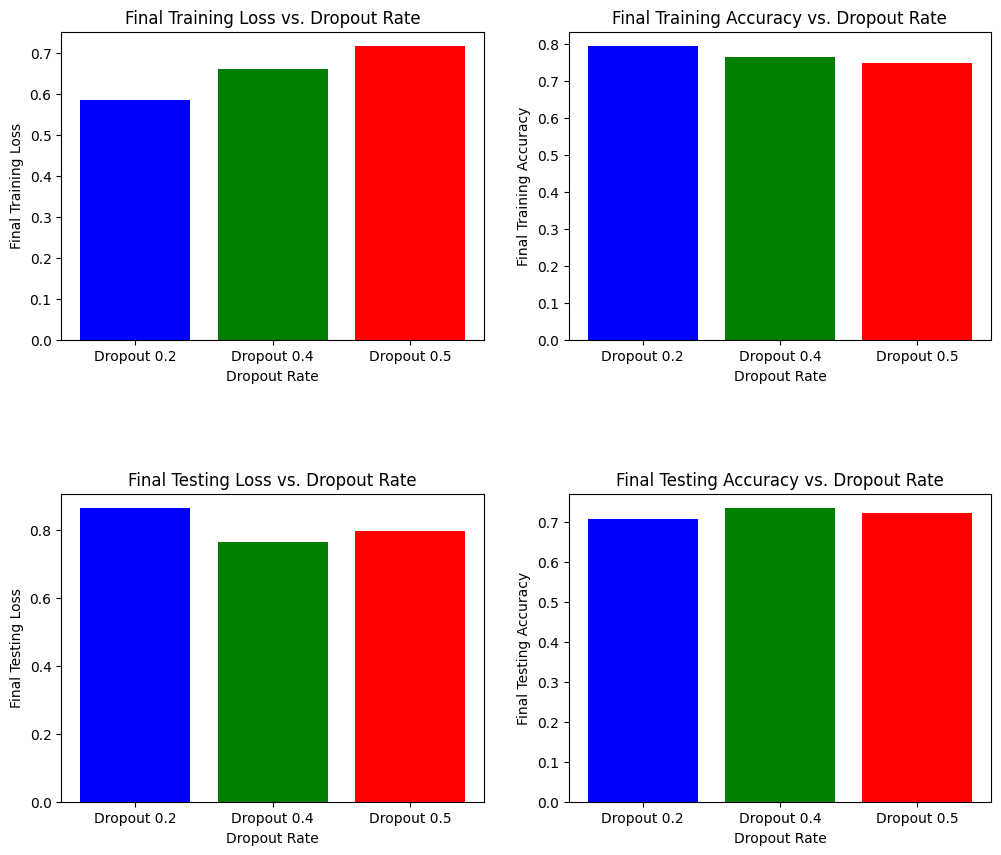

In [ ]:
# Create bar charts for final metrics
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.subplots_adjust(hspace=0.5)

metrics = ['Final Training Loss', 'Final Training Accuracy', 'Final Testing Loss', 'Final Testing Accuracy']

for i, metric in enumerate(metrics):
    ax = axes[i // 2, i % 2]
    values = [results[key][metric] for key in results]
    ax.bar(results.keys(), values, color=['blue', 'green', 'red', 'purple'])
    ax.set_xlabel('Dropout Rate')
    ax.set_ylabel(metric)
    ax.set_title(f'{metric} vs. Dropout Rate')

plt.show()